TASK 6:  K-Nearest Neighbors (KNN) Classification

K = 1: Accuracy = 0.9778
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

K = 3: Accuracy = 0.9778
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

K = 5: Accuracy = 0.9778
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

K = 7: Accuracy = 0.9778
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



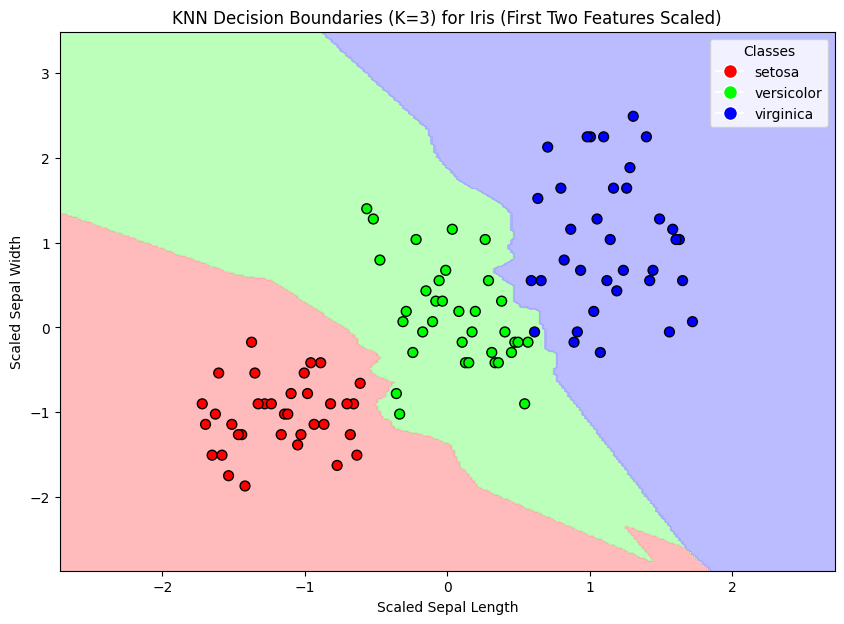

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('Iris.csv')  

# Map species to numeric labels
label_mapping = {label: idx for idx, label in enumerate(data['Species'].unique())}
data['Species'] = data['Species'].map(label_mapping)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalizing the feeatures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train and evaluate KNN for different K values
k_values = [1, 3, 5, 7]
results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[k] = {'accuracy': accuracy, 'confusion_matrix': cm}
    print(f"K = {k}: Accuracy = {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

# Visualizing decision boundaries using first two features
X_train_2 = X_train[:, :2]
X_test_2 = X_test[:, :2]

k_viz = 3
knn_viz = KNeighborsClassifier(n_neighbors=k_viz)
knn_viz.fit(X_train_2, y_train)

x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(
    X_train_2[:, 0], X_train_2[:, 1], c=y_train,
    cmap=cmap_bold, edgecolor='k', s=50
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (K={k_viz}) for Iris (First Two Features Scaled)")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=cmap_bold.colors[i], markersize=10)
    for i, label in enumerate(['setosa', 'versicolor', 'virginica'])
]
plt.legend(handles=legend_elements, title="Classes")
plt.show()
